## 爬蟲進階班: 攻防與金融大數據分析

公開資訊觀測站：http://mops.twse.com.tw/mops/web/t163sb19

## 取得水泥行業的EPS資料

In [ ]:
import requests
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb19'
payload = {
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code':'01',
    'year':'105',
    'season':'01',
}
res = requests.post(url, data = payload)
res.text

## 取得所有公司EPS

In [ ]:
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb19'
payload = {
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code':'',
    'year':'105',
    'season':'01',
}
res = requests.post(url, data = payload)

In [ ]:
res.encoding

In [ ]:
res.encoding = 'utf-8' 
res.text

## 使用Pandas解析資料

In [149]:
import pandas
dfs = pandas.read_html(res.text, header=0) #header=0以第一行當欄位名稱
type(dfs)

list

In [150]:
dfs

[         公司代號        公司名稱    產業別  基本每股盈餘(元)       普通股每股面額        營業收入  \
 0        1104  環球水泥股份有限公司   水泥工業       0.55  新台幣 10.0000元   1105803.0   
 1        1108  幸福水泥股份有限公司   水泥工業       0.26  新台幣 10.0000元    995636.0   
 2        1110  東南水泥股份有限公司   水泥工業       0.21  新台幣 10.0000元    383670.0   
 3        1101  台灣水泥股份有限公司   水泥工業       0.06  新台幣 10.0000元  17724112.0   
 4        1102  亞洲水泥股份有限公司   水泥工業       0.06  新台幣 10.0000元  13038960.0   
 5  基本每股盈餘0至1元         計5家   0.23        NaN           NaN         NaN   
 6        1109  信大水泥股份有限公司   水泥工業      -0.03  新台幣 10.0000元    875999.0   
 7        1103  嘉新水泥股份有限公司   水泥工業      -0.29  新台幣 10.0000元    541218.0   
 8  基本每股盈餘小於0元         計2家  -0.16        NaN           NaN         NaN   
 9        水泥工業         計7家   0.12        NaN           NaN         NaN   
 
        營業利益  營業外收入及支出      稅後淨利  
 0   31658.0  311221.0  342983.0  
 1  133019.0   -6225.0  104371.0  
 2   15784.0  181488.0  216613.0  
 3  483889.0 -206042.0   94527.0  
 4  40625

In [151]:
dfs[0]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,1104,環球水泥股份有限公司,水泥工業,0.55,新台幣 10.0000元,1105803.0,31658.0,311221.0,342983.0
1,1108,幸福水泥股份有限公司,水泥工業,0.26,新台幣 10.0000元,995636.0,133019.0,-6225.0,104371.0
2,1110,東南水泥股份有限公司,水泥工業,0.21,新台幣 10.0000元,383670.0,15784.0,181488.0,216613.0
3,1101,台灣水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,17724112.0,483889.0,-206042.0,94527.0
4,1102,亞洲水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,13038960.0,406252.0,-123702.0,194459.0
5,基本每股盈餘0至1元,計5家,0.23,NaN,NaN,NaN,NaN,NaN,NaN
6,1109,信大水泥股份有限公司,水泥工業,-0.03,新台幣 10.0000元,875999.0,-26416.0,-162.0,-33204.0
7,1103,嘉新水泥股份有限公司,水泥工業,-0.29,新台幣 10.0000元,541218.0,-91274.0,-100254.0,-188985.0
8,基本每股盈餘小於0元,計2家,-0.16,NaN,NaN,NaN,NaN,NaN,NaN
9,水泥工業,計7家,0.12,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
len(dfs)

28

In [153]:
dfall = []
for df in dfs:
    df = df[df['公司代號'].str.match('^[0-9]+')]
    dfall.append(df)


In [154]:
stockdf = pandas.concat(dfall, ignore_index=True)
type(stockdf)

pandas.core.frame.DataFrame

In [155]:
stockdf.columns

Index(['公司代號', '公司名稱', '產業別', '基本每股盈餘(元)', '普通股每股面額', '營業收入', '營業利益',
       '營業外收入及支出', '稅後淨利'],
      dtype='object')

In [156]:
# .head 查看前幾筆就好
stockdf.head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,1104,環球水泥股份有限公司,水泥工業,0.55,新台幣 10.0000元,1105803.0,31658,311221,342983.0
1,1108,幸福水泥股份有限公司,水泥工業,0.26,新台幣 10.0000元,995636.0,133019,-6225,104371.0
2,1110,東南水泥股份有限公司,水泥工業,0.21,新台幣 10.0000元,383670.0,15784,181488,216613.0
3,1101,台灣水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,17724112.0,483889,-206042,94527.0
4,1102,亞洲水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,13038960.0,406252,-123702,194459.0


In [157]:
stockdf['營業收入']

0        1105803.0
1         995636.0
2         383670.0
3       17724112.0
4       13038960.0
5         875999.0
6         541218.0
7         535660.0
8          19119.0
9        3715766.0
10       7422008.0
11       3927503.0
12       4255524.0
13       1691729.0
14     106667516.0
15      17743529.0
16        558307.0
17       2554434.0
18       1310566.0
19       1547878.0
20        629099.0
21        604459.0
22       1754858.0
23        646025.0
24       1821955.0
25       2633013.0
26        152465.0
27        906830.0
28       3518095.0
29        666825.0
          ...     
858     17402823.0
859      4045268.0
860      1440311.0
861       666695.0
862      3360488.0
863      1177900.0
864      9003022.0
865      4242246.0
866      2610119.0
867      2237809.0
868       805983.0
869      1033959.0
870       777724.0
871       719859.0
872       496435.0
873     28289227.0
874       720915.0
875       742426.0
876      1157309.0
877      1427857.0
878       419913.0
879       91

In [158]:
stockdf['公司代號']

0      1104
1      1108
2      1110
3      1101
4      1102
5      1109
6      1103
7      1256
8      1235
9      1702
10     1227
11     1232
12     1215
13     1231
14     1216
15     1210
16     1233
17     1225
18     1229
19     1203
20     1737
21     1236
22     1234
23     1220
24     1218
25     1219
26     1213
27     1217
28     1201
29     1340
       ... 
858    2354
859    2404
860    3617
861    2488
862    2373
863    6192
864    6139
865    6196
866    2360
867    2464
868    2433
869    3305
870    6201
871    3030
872    2423
873    2312
874    8021
875    2477
876    2461
877    5225
878    6215
879    2359
880    2390
881    2482
882    2495
883    8201
884    2497
885    3018
886    3043
887    3518
Name: 公司代號, dtype: object

## 使用正規表達式

In [159]:
#contains 檢查裡面有沒有包含特定文字
stockdf['公司代號'].str.contains('基本')
stockdf[stockdf['公司代號'].str.contains('基本')]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利


In [160]:
# match 可以准許你使用正規表達法檢查
stockdf['公司代號'].str.match('^[0-9]')
stockdf = stockdf[stockdf['公司代號'].str.match('^[0-9]')]
stockdf

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,1104,環球水泥股份有限公司,水泥工業,0.55,新台幣 10.0000元,1105803.0,31658,311221,342983.0
1,1108,幸福水泥股份有限公司,水泥工業,0.26,新台幣 10.0000元,995636.0,133019,-6225,104371.0
2,1110,東南水泥股份有限公司,水泥工業,0.21,新台幣 10.0000元,383670.0,15784,181488,216613.0
3,1101,台灣水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,17724112.0,483889,-206042,94527.0
4,1102,亞洲水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,13038960.0,406252,-123702,194459.0
5,1109,信大水泥股份有限公司,水泥工業,-0.03,新台幣 10.0000元,875999.0,-26416,-162,-33204.0
6,1103,嘉新水泥股份有限公司,水泥工業,-0.29,新台幣 10.0000元,541218.0,-91274,-100254,-188985.0
7,1256,鮮活控股股份有限公司,食品工業,1.44,新台幣 10.0000元,535660.0,58197,5579,39253.0
8,1235,興泰實業股份有限公司,食品工業,1.42,新台幣 10.0000元,19119.0,2839,81683,83417.0
9,1702,南僑化學工業股份有限公司,食品工業,1.16,新台幣 10.0000元,3715766.0,449614,-25862,277797.0


In [161]:
stockdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 9 columns):
公司代號         888 non-null object
公司名稱         888 non-null object
產業別          888 non-null object
基本每股盈餘(元)    888 non-null float64
普通股每股面額      888 non-null object
營業收入         888 non-null float64
營業利益         888 non-null object
營業外收入及支出     888 non-null object
稅後淨利         888 non-null float64
dtypes: float64(3), object(6)
memory usage: 69.4+ KB


In [164]:
import numpy as np
stockdf = stockdf.applymap(lambda e: 0 if e == '--' else e)
stockdf['營業利益'] = stockdf['營業利益'].astype(int)

In [163]:
stockdf.describe()

,基本每股盈餘(元),營業收入,稅後淨利
count,888.000000,8.880000e+02,8.880000e+02
mean,0.512703,7.343384e+06,3.902492e+05
std,1.245745,3.770393e+07,2.623865e+06
min,-3.170000,4.900000e+01,-8.581508e+06
25%,0.020000,5.011640e+05,4.496000e+03
50%,0.270000,1.225597e+06,6.074100e+04
75%,0.802500,3.612438e+06,2.072038e+05
max,27.010000,9.580092e+08,6.479260e+07


In [165]:
stockdf['營業利益'].max()

70467314

In [166]:
stockdf['營業利益'] == stockdf['營業利益'].max()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
858    False
859    False
860    False
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
Name: 營業利益, dtype: bool

In [167]:
# 抓出營業利益最大
stockdf[ stockdf['營業利益'] == stockdf['營業利益'].max() ] 

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
484,2330,台灣積體電路製造股份有限公司,半導體業,2.5,新台幣 10.0000元,203495361.0,70467314,1.78858e+06,64792597.0


In [168]:
# 抓出營業利益最小
stockdf[ stockdf['營業利益'] == stockdf['營業利益'].min() ]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
680,3481,群創光電股份有限公司,光電業,-0.86,新台幣 10.0000元,56417120.0,-8402287,-131293,-8581508.0


In [169]:
# sort_values 排序 營業收入 由小到大 ，取得前三名
# select * from stockdf ORDER BY '營業收入' limit 3
stockdf.sort_values('營業收入').head(3)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
262,1438,裕豐國際開發股份有限公司,建材營造,-0.01,新台幣 10.0000元,49.0,-2243,821,-1422.0
269,2528,皇普建設股份有限公司,建材營造,-0.08,新台幣 10.0000元,66.0,-8311,-1947,-10258.0
608,2424,隴華電子股份有限公司,電腦及週邊設備業,-0.42,新台幣 10.0000元,1543.0,-5467,-8086,-12628.0


In [170]:
# sort_values 排序 營業收入 由大到小 ，取得前三名
# select * from stockdf ORDER BY '營業收入' desc limit 3
stockdf.sort_values('營業收入', ascending=False).head(3)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
857,2317,鴻海精密工業股份有限公司,其他電子業,1.76,新台幣 10.0000元,958009217.0,35324664,981284,27548860.0
562,4938,和碩聯合科技股份有限公司,電腦及週邊設備業,1.58,新台幣 10.0000元,256382310.0,6775788,-274616,4841286.0
484,2330,台灣積體電路製造股份有限公司,半導體業,2.50,新台幣 10.0000元,203495361.0,70467314,1.78858e+06,64792597.0


In [176]:
df1 = stockdf.groupby(['產業別'], sort=True)['營業收入'].max()
print(df1)

產業別
光電業          71135232.0
其他           67441263.0
其他電子業       958009217.0
化學工業          9088926.0
半導體業        203495361.0
塑膠工業         75799504.0
建材營造          9130633.0
橡膠工業         29345194.0
水泥工業         17724112.0
汽車工業         40176914.0
油電燃氣業       124471678.0
玻璃陶瓷          9582821.0
生技醫療業         4412638.0
紡織纖維         51595906.0
航運業          34999023.0
觀光事業          5468800.0
貿易百貨         60406712.0
資訊服務業         3723651.0
通信網路業        56944156.0
造紙工業         15013392.0
金融保險業       120302943.0
鋼鐵工業         64958543.0
電器電纜         31928919.0
電子通路業       121532749.0
電子零組件業       47607216.0
電機機械         22029509.0
電腦及週邊設備業    256382310.0
食品工業        106667516.0
Name: 營業收入, dtype: float64


/Users/pellok/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


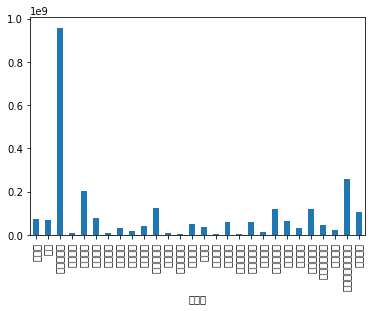

In [195]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
df1.plot.bar()

Populating the interactive namespace from numpy and matplotlib


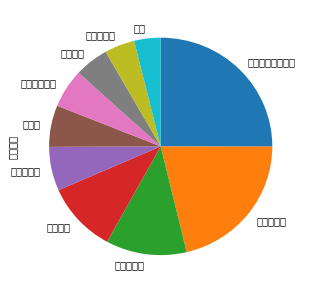

In [189]:
# 分產業別 的營業收入總和，排序，取出前10名
revenue_sum = stockdf.groupby(['產業別'])['營業收入'].sum().sort_values(ascending=False).head(10)
%pylab inline
# 圓圖原則：順時針，由大到小排序，最好很多小的歸類為其他
revenue_sum.plot(kind='pie', figsize=[5,5], startangle = 90, counterclock = False)

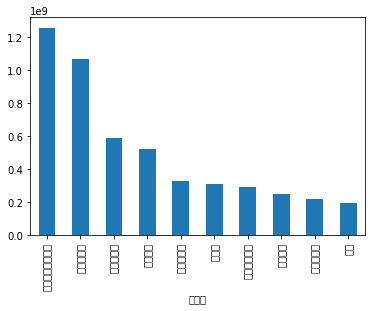

In [190]:
revenue_sum.plot(kind='bar')

## 正規表達法

In [ ]:
import re
phones = ['0912345678', '0922334444', '0955-111-222', '0955-111333', 'a0912345678', '0912345678b']
for phone in phones:
    #m = re.search('\d{10}', phone)
    #m = re.search('\d{4}\d{3}\d{3}', phone)
    #m = re.search('\d[4]-\d{3}-\d{3}', phone)
    #m = re.search('\d{4}-{0,1}\d{3}-{0,1}\d{3}', phone)
    #m = re.search('\d{4}-?\d{3}-?\d{3}', phone) # ? == {0,1}
    #m = re.search('^\d{4}-?\d{3}-?\d{3}', phone) # ^ match begin
    m = re.search('^\d{4}-?\d{3}-?\d{3}$', phone) # $ match end
    print(m)

In [ ]:

e = '3'
re.search('3', '3')
re.search('4', e)
re.search('[0123456789]', e)
re.search('[0-9]', e)
re.search('\d', e) # \d == [0-9] == [0123456789]

In [ ]:
e = 'q'
re.search('[abcdefghijklmnopqrstuvwxyz]', e)
re.search('[a-z]', e) # [a-z] == [abcdefghijklmnopqrstuvwxyz]
e = 'Q'
re.search('[a-z]', e)
re.search('[a-zA-Z]', e) # 大小寫a-zA-Z
re.search('\w', e) # \w == [a-zA-Z0-9]

In [ ]:
e = 'apple'
re.search('\w{5}', e) # match exact 5 character
re.search('\w{3,8}', e) # match at least 3 character, at most 8 character
re.search('\w{0,}', e) #  match at least 0 character
re.search('\w*', e) # =={0,}
re.search('\w{1,}', e) #  match at least 1 character
re.search('\w+', e) # =={1,}

## 圖表資料

In [202]:
import requests
res = requests.get('https://statementdog.com/analysis/analysis_ajax/2330/2012/1/2017/4/1?queried_by_user=true&_=1493525229835')
res_json = res.json()
res_json

{'0': {'data': [0, 'success'], 'label': 'Return'},
 '1': {'data': {'acw': '1122',
   'category': '半導體',
   'ceo': '劉德音及魏哲家',
   'chairman': '張忠謀',
   'latest_closing_price': '2017-04-28 194.5',
   'latest_eps4q': '12.89',
   'latest_roe4q': '25.59',
   'latest_yoy_monthly_revenue': '17.49',
   'main_business': '依客戶之訂單與其提供之產品設計說明，以從事製造與銷售積體電路<BR>以及其他晶圓半導體裝置。提供前述產品之封裝與測試服務、積體電<BR>路之電腦輔助設計技術服務。提供製造光罩及其設計服務。',
   'stock_exchange': '上市',
   'stock_id': 323,
   'ticker_name': '2330 台積電'},
  'label': 'StockInfo'},
 '10': {'data': [], 'label': '最新彼得林區評價'},
 '100': {'data': [[0, '16.64'],
   [1, '16.47'],
   [2, '19.38'],
   [3, '19.25'],
   [4, '18.26'],
   [5, '17.84'],
   [6, '18.09'],
   [7, '17.11'],
   [8, '16.86'],
   [9, '16.46'],
   [10, '18.31'],
   [11, '19.33'],
   [12, '20.85'],
   [13, '21.5'],
   [14, '21.63'],
   [15, '19.63'],
   [16, '17.98'],
   [17, '16.89'],
   [18, '18.81'],
   [19, '19.03']],
  'label': '近四季ROA'},
 '101': {'data': [[0, '20.63'],
   [1, '22.93'],
   [2, '2

In [203]:
res_json['11']

{'data': {'month': {'axis': [[0, '201201'],
    [1, '201202'],
    [2, '201203'],
    [3, '201204'],
    [4, '201205'],
    [5, '201206'],
    [6, '201207'],
    [7, '201208'],
    [8, '201209'],
    [9, '201210'],
    [10, '201211'],
    [11, '201212'],
    [12, '201301'],
    [13, '201302'],
    [14, '201303'],
    [15, '201304'],
    [16, '201305'],
    [17, '201306'],
    [18, '201307'],
    [19, '201308'],
    [20, '201309'],
    [21, '201310'],
    [22, '201311'],
    [23, '201312'],
    [24, '201401'],
    [25, '201402'],
    [26, '201403'],
    [27, '201404'],
    [28, '201405'],
    [29, '201406'],
    [30, '201407'],
    [31, '201408'],
    [32, '201409'],
    [33, '201410'],
    [34, '201411'],
    [35, '201412'],
    [36, '201501'],
    [37, '201502'],
    [38, '201503'],
    [39, '201504'],
    [40, '201505'],
    [41, '201506'],
    [42, '201507'],
    [43, '201508'],
    [44, '201509'],
    [45, '201510'],
    [46, '201511'],
    [47, '201512'],
    [48, '201601'],
    [

In [206]:
data = pandas.DataFrame(res_json['11']['data']['month']['data'])
data.columns = ['idx','price']
data.head()

,idx,price
0,0,76.4
1,1,78.13
2,2,82.25
3,3,84.28
4,4,83.94


In [207]:
axis = pandas.DataFrame(res_json['11']['data']['month']['axis'])
axis.columns = ['idx2','yearmonth']
axis.head()

,idx2,yearmonth
0,0,201201
1,1,201202
2,2,201203
3,3,201204
4,4,201205


In [208]:
stockdf = pandas.concat([axis, data], axis=1)
stockdf

,idx2,yearmonth,idx,price
0,0,201201,0,76.4
1,1,201202,1,78.13
2,2,201203,2,82.25
3,3,201204,3,84.28
4,4,201205,4,83.94
5,5,201206,5,79.5
6,6,201207,6,78.09
7,7,201208,7,82.18
8,8,201209,8,85.19
9,9,201210,9,87.64


In [210]:
stockdf = stockdf[['yearmonth', 'price']]
stockdf

,yearmonth,price
0,201201,76.4
1,201202,78.13
2,201203,82.25
3,201204,84.28
4,201205,83.94
5,201206,79.5
6,201207,78.09
7,201208,82.18
8,201209,85.19
9,201210,87.64


In [217]:
stockdf.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
      

In [ ]:
stockdf['price'] = stockdf

## 買賣日報表

## google trend 趨勢圖

In [220]:
import pandas
data = pandas.read_csv('GoogleTrendsData.csv', index_col='Date')
data.head()

,djia,debt
Date,,
2004-01-14,10485.18,0.210000
2004-01-22,10528.66,0.210000
2004-01-28,10702.51,0.210000
2004-02-04,10499.18,0.213333
2004-02-11,10579.03,0.200000
